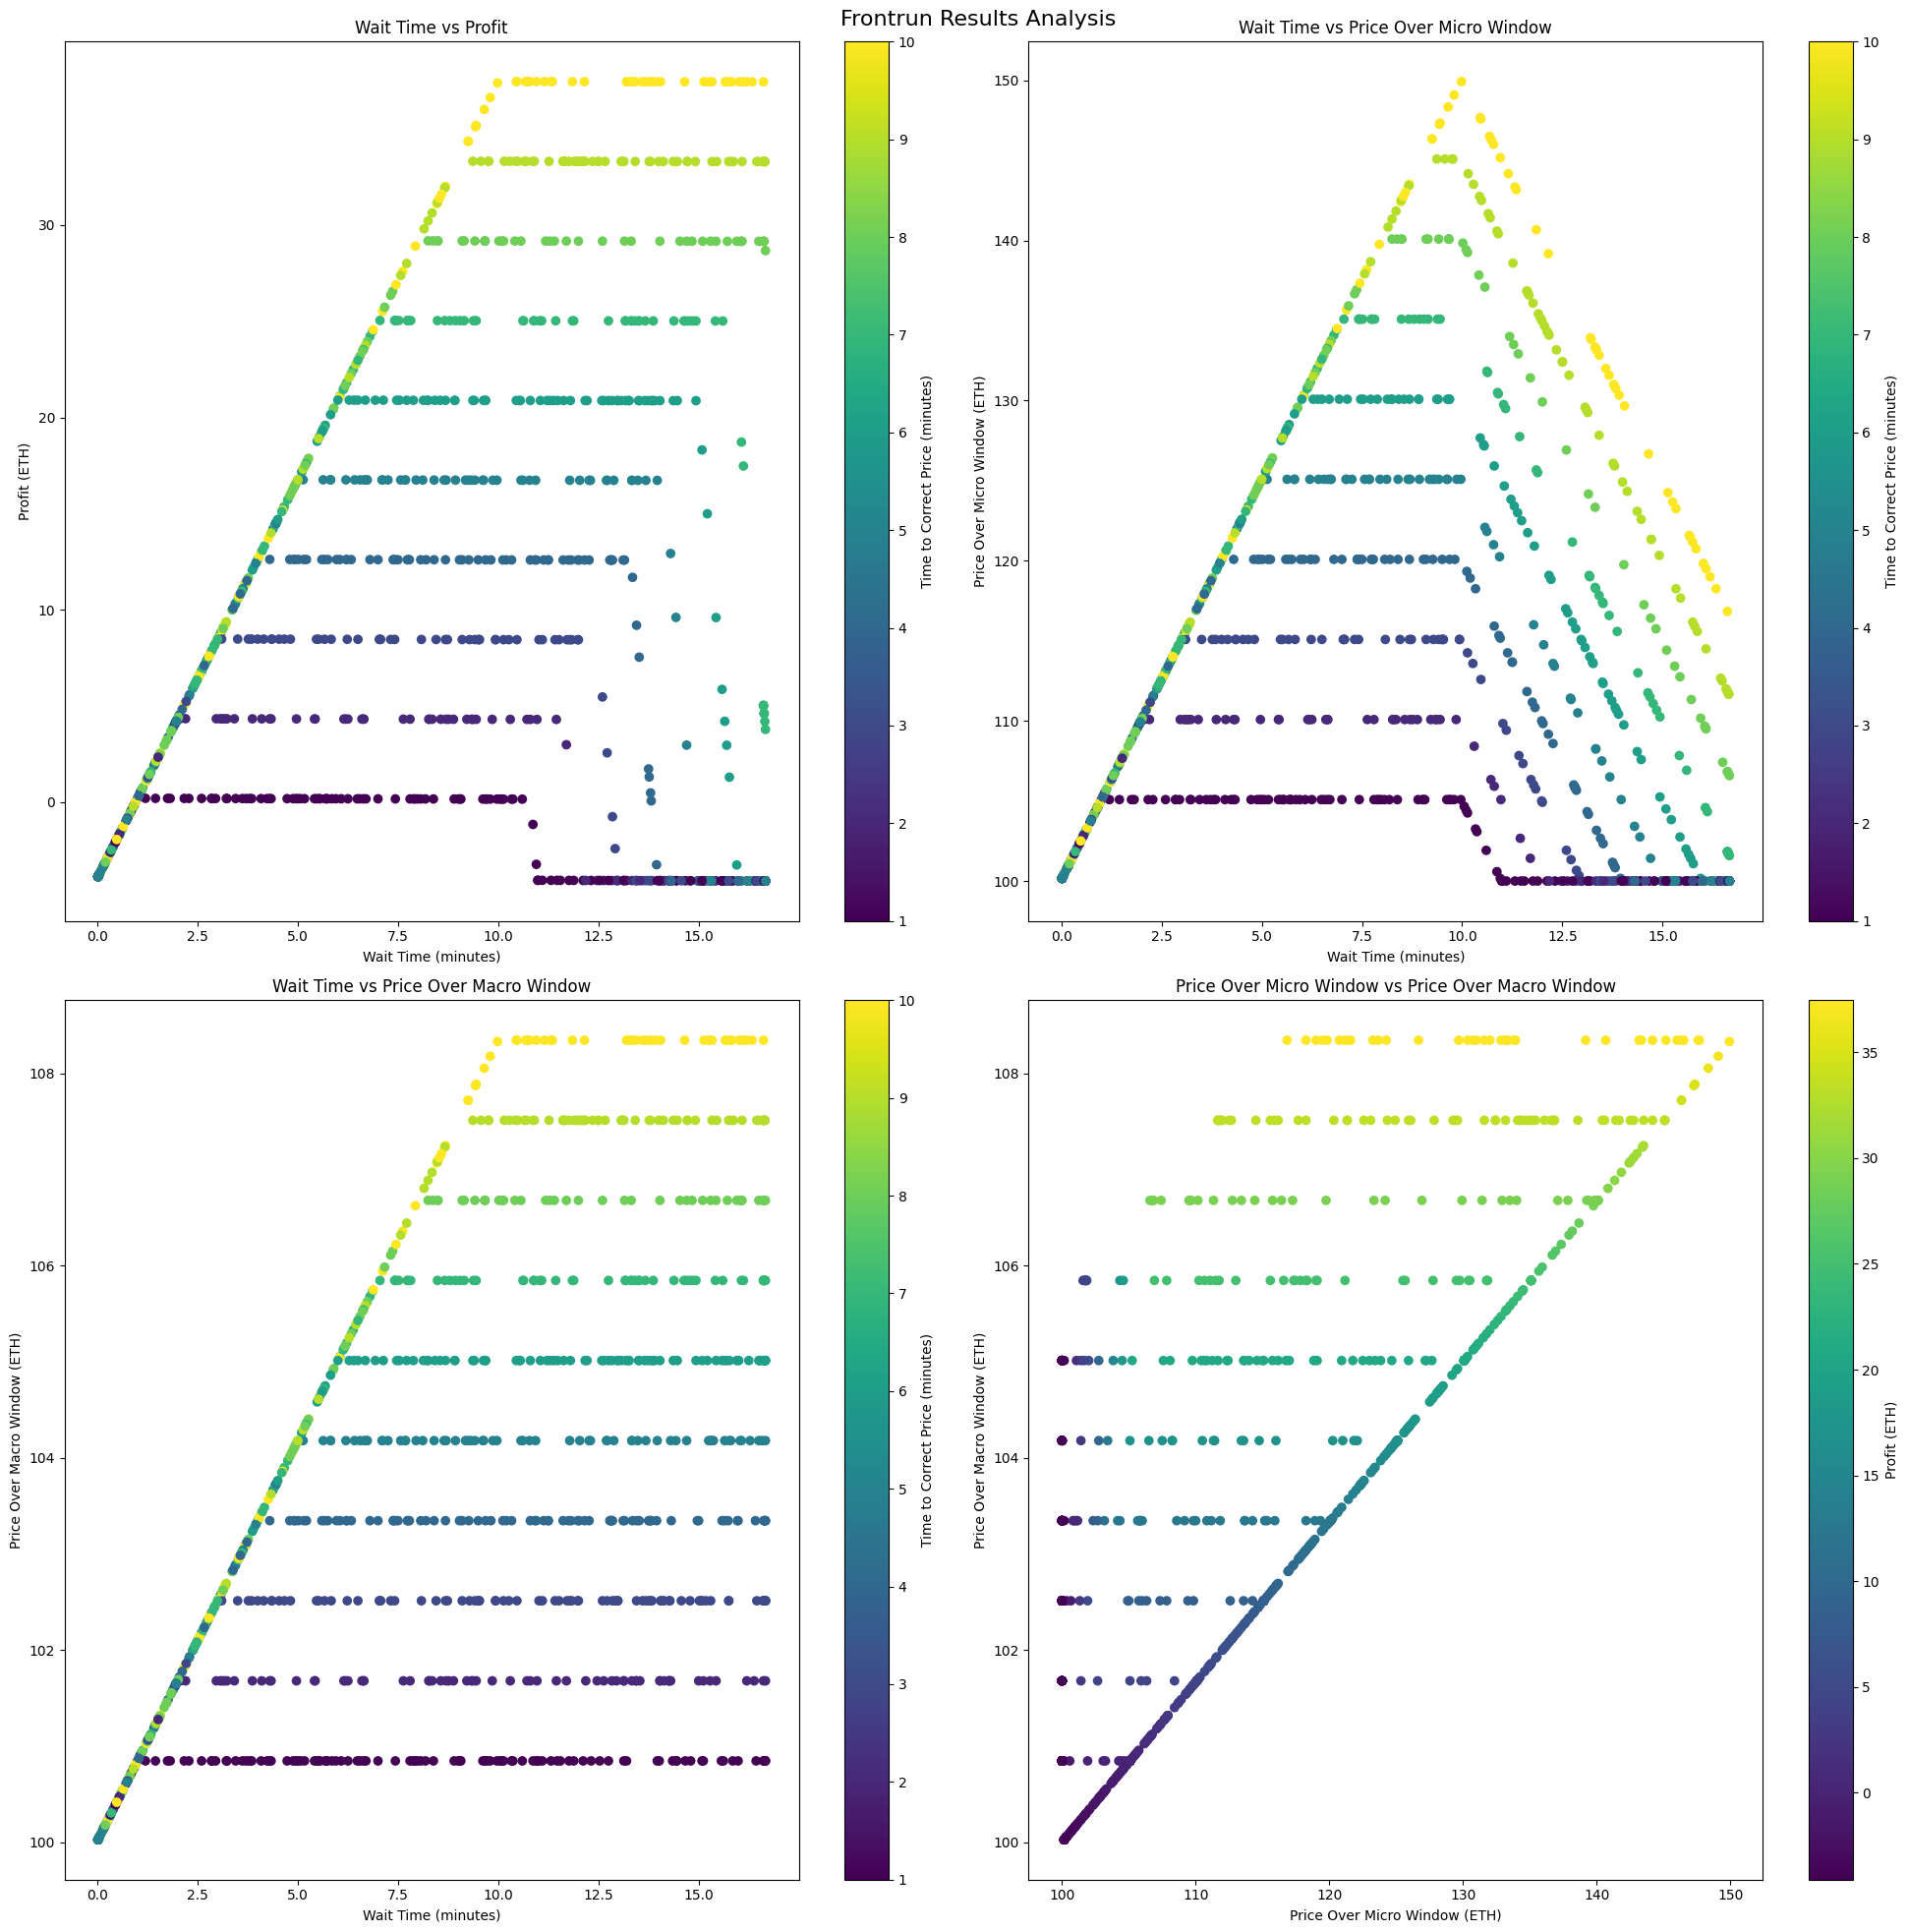

       waitTimeToUnwind  timeToCorrectPrice  priceOverMicroWindow  \
count       1002.000000         1002.000000           1002.000000   
mean         496.226547          327.604790            114.531188   
std          314.225394          172.322826             12.742062   
min            1.000000           60.000000            100.000000   
25%          216.250000          180.000000            103.770833   
50%          503.500000          360.000000            111.791667   
75%          779.000000          480.000000            124.020833   
max         1000.000000          600.000000            149.916667   

       priceOverMacroWindow  waitTimeMinutes  timeToCorrectPriceMinutes  \
count           1002.000000      1002.000000                1002.000000   
mean             103.452027         8.270442                   5.460080   
std                2.362800         5.237090                   2.872047   
min              100.027778         0.016667                   1.000000   
25%

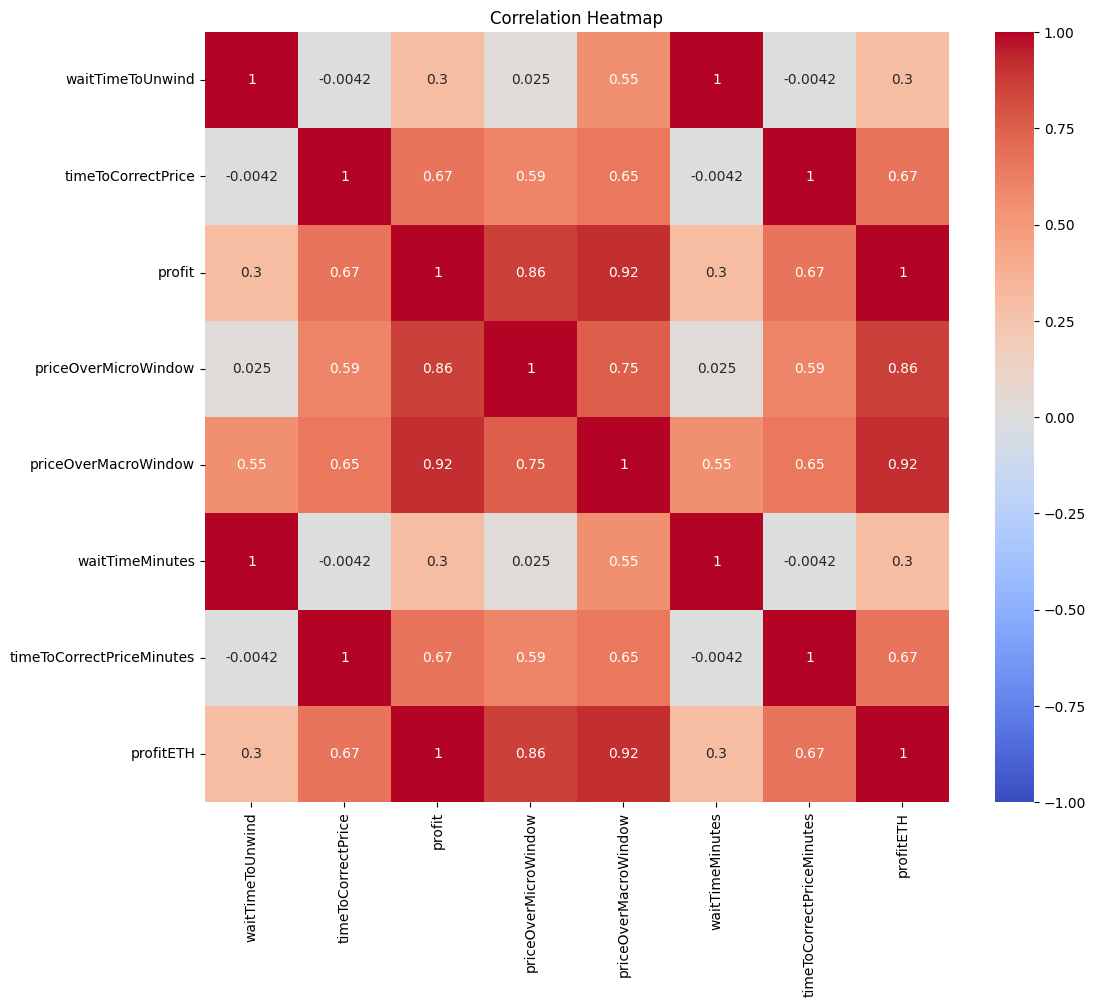

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('frontrun_results.csv')

# Convert time columns to minutes
df['waitTimeMinutes'] = df['waitTimeToUnwind'] / 60
df['timeToCorrectPriceMinutes'] = df['timeToCorrectPrice'] / 60

# Convert price columns from wei to ETH
for col in ['priceOverMicroWindow', 'priceOverMacroWindow']:
    df[col] = df[col].astype(float) / 1e18

# Convert profit to ETH
df['profitETH'] = df['profit'].astype(float) / 1e18

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Frontrun Results Analysis', fontsize=16)

# Function to create scatter plot with colors for timeToCorrectPrice
def scatter_plot_with_colors(x, y, time_col, ax, title, xlabel, ylabel):
    scatter = ax.scatter(df[x], df[y], c=df[time_col], cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Time to Correct Price (minutes)')

# Plot 1: Wait Time vs Profit
scatter_plot_with_colors('waitTimeMinutes', 'profitETH', 'timeToCorrectPriceMinutes', axs[0, 0], 
                         'Wait Time vs Profit', 'Wait Time (minutes)', 'Profit (ETH)')

# Plot 2: Wait Time vs Price Over Micro Window
scatter_plot_with_colors('waitTimeMinutes', 'priceOverMicroWindow', 'timeToCorrectPriceMinutes', axs[0, 1],
                         'Wait Time vs Price Over Micro Window', 'Wait Time (minutes)', 'Price Over Micro Window (ETH)')

# Plot 3: Wait Time vs Price Over Macro Window
scatter_plot_with_colors('waitTimeMinutes', 'priceOverMacroWindow', 'timeToCorrectPriceMinutes', axs[1, 0],
                         'Wait Time vs Price Over Macro Window', 'Wait Time (minutes)', 'Price Over Macro Window (ETH)')

# Plot 4: Price Over Micro Window vs Price Over Macro Window
scatter = axs[1, 1].scatter(df['priceOverMicroWindow'], df['priceOverMacroWindow'], c=df['profitETH'], cmap='viridis')
axs[1, 1].set_title('Price Over Micro Window vs Price Over Macro Window')
axs[1, 1].set_xlabel('Price Over Micro Window (ETH)')
axs[1, 1].set_ylabel('Price Over Macro Window (ETH)')
cbar = plt.colorbar(scatter, ax=axs[1, 1])
cbar.set_label('Profit (ETH)')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print some basic statistics
print(df.describe())

# Find the wait time that resulted in the maximum profit
max_profit_row = df.loc[df['profitETH'].idxmax()]
print(f"\nMaximum profit of {max_profit_row['profitETH']:.6f} ETH was achieved with:")
print(f"- Wait time: {max_profit_row['waitTimeMinutes']:.2f} minutes")
print(f"- Time to correct price: {max_profit_row['timeToCorrectPriceMinutes']:.2f} minutes")

# Calculate correlations
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()